In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import random

sys_values = False
if (sys_values):
    import sys
    print("sys.executable: ", sys.executable)
    print("-----------------")
    !type python
    print("-----------------")
    from pprint import pprint as p
    p(sys.path)

/var/folders/5f/rgfnh64x7k1bfzln9qq9n76r0000gr/T/ipykernel_31765/3877261621.py:19: UserWarning: PySoundFile failed. Trying audioread instead.
  x, sr = librosa.load(audio_path, sr=None)
/Users/brash/anaconda3/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


<class 'numpy.ndarray'> <class 'int'>


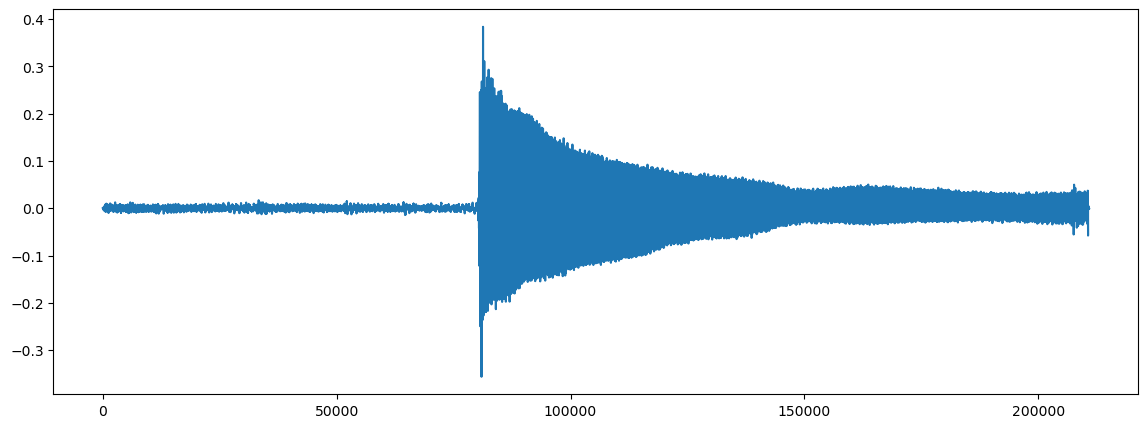

In [3]:
import librosa

choice = 3

if (choice == 1):
    audio_path = '/Users/brash/Phys340/JupyterNotebooks/Fourier_Series/GuitarSamples/LowE.mp4'
    start_time = 2.18
elif (choice == 2):
    audio_path = '/Users/brash/Phys340/JupyterNotebooks/Fourier_Series/GuitarSamples/MidE.mp4'
    start_time = 2.38
elif (choice == 3):
    audio_path = '/Users/brash/Phys340/JupyterNotebooks/Fourier_Series/GuitarSamples/HighE.mp4'
    start_time = 1.88

#import audioread.ffdec
#aro = audioread.ffdec.FFmpegAudioFile(audio_path)
#x, sr = librosa.load(aro)

x, sr = librosa.load(audio_path, sr=None)

print(type(x), type(sr))

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

import librosa.display

plt.plot(x)

/var/folders/5f/rgfnh64x7k1bfzln9qq9n76r0000gr/T/ipykernel_31765/4227708434.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, offset=start_time,duration=3.20,sr=None)
/Users/brash/anaconda3/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Text(0.5, 1.0, 'Monophonic')

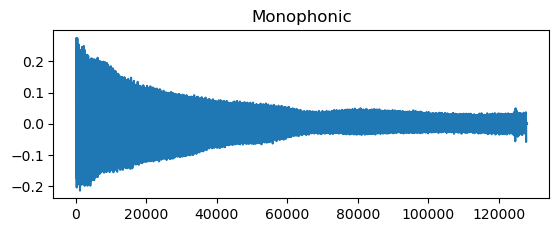

In [4]:
y, sr = librosa.load(audio_path, offset=start_time,duration=3.20,sr=None)

plt.figure()
plt.subplot(2, 1, 1)
#librosa.display.waveshow(y)
plt.plot(y)
plt.title('Monophonic')

In [5]:
sp = np.fft.fft(y)
dt = 1.0/sr
nframes = len(y)
f = []
t = []
power = []
for i in range(int(len(y)/2)):
    t.append(i*dt)
    f.append(i/(nframes*dt))
    power.append(sp.real[i]**2+sp.imag[i]**2)
t = np.array(t)
f = np.array(f)
power = np.array(power)

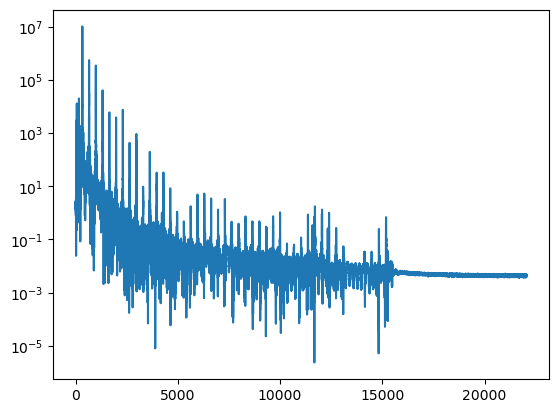

In [6]:
plt.yscale("log")
#plt.xscale("log")
plt.plot(f, power)

(0.0, 22049.82769668365)

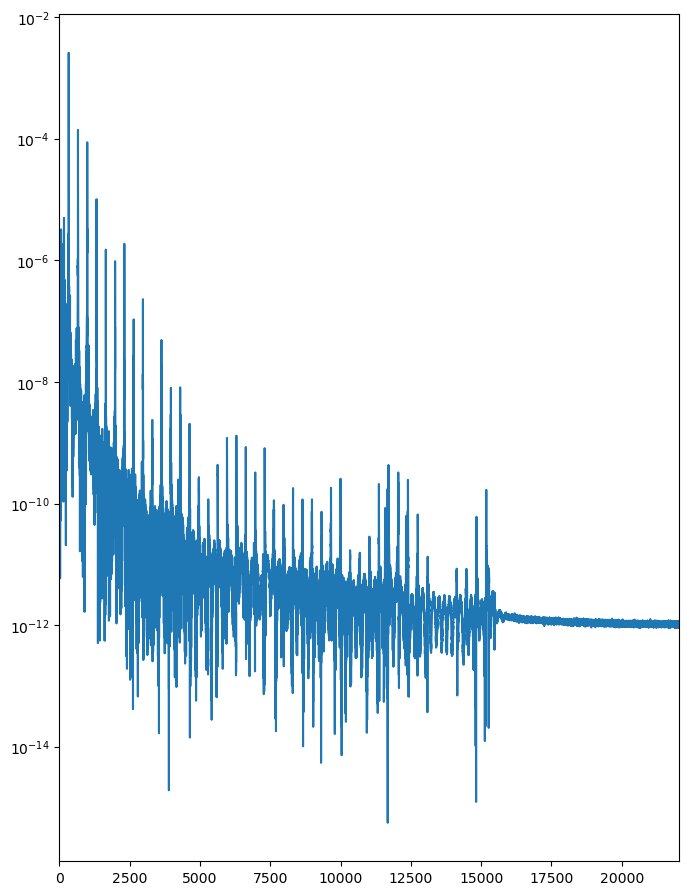

In [7]:
N_fft = len(y)
yfft = fft(y)
yfftReal =2.0/N_fft*yfft.real
yfftImag = 2.0/N_fft*yfft.imag
powerfft = 4.0/N_fft**2*abs(yfft)**2

dt = 1.0/sr
f = [i/(N_fft*dt) for i in range(0,N_fft)]


fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,11)) 
plt.yscale("log")
axs2.plot(f,powerfft)
axs2.set_xlim(0,np.max(f)/2)

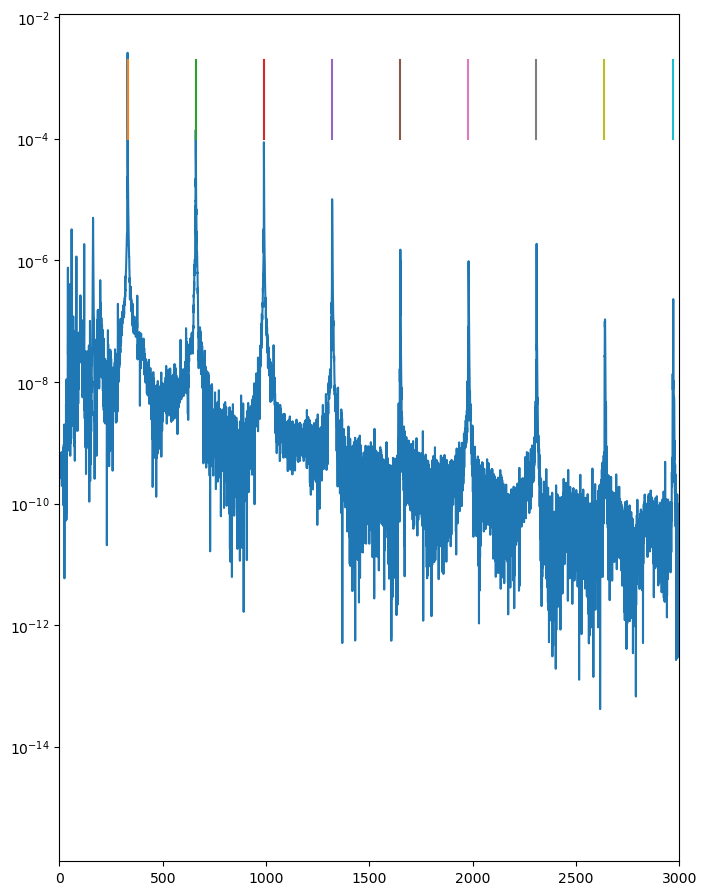

In [8]:
fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,11)) 
plt.yscale("log")
axs2.plot(f,powerfft)
axs2.set_xlim(0,3000)

if (choice == 1):
    e_nominal = 82.407
elif (choice == 2):
    e_nominal = 164.814
elif (choice == 3):
    e_nominal = 329.628
    
efreq = [e_nominal*i for i in range(1,10)]

for i in range(len(efreq)):
    vliney = []
    vlinex = []
    vlinex.append(efreq[i])
    vliney.append(0.0001)
    vlinex.append(efreq[i])
    vliney.append(0.002)
    axs2.plot(vlinex,vliney)
